In [1]:
import pandas as pd
import spacy

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/balanced_ai_human_prompts.csv")
df.head(5)

,text,generated
0,"Machine learning, a subset of artificial intel...",1
1,"A decision tree, a prominent machine learning ...",1
2,"Education, a cornerstone of societal progress,...",1
3,"Computers, the backbone of modern technology, ...",1
4,"Chess, a timeless game of strategy and intelle...",1


In [3]:
df['text_len'] = df['text'].str.len()
df['word_count'] = df['text'].str.split(" ").str.len()

length_stats = df.groupby('generated')[['text_len', 'word_count']].agg(['mean', 'median', 'std']).round(2)
print(length_stats)

          text_len                 word_count               
              mean  median     std       mean median     std
generated                                                   
0          3172.58  2987.0  918.44     552.93  521.0  159.24
1           169.26    95.0  342.69      24.63   14.0   49.09


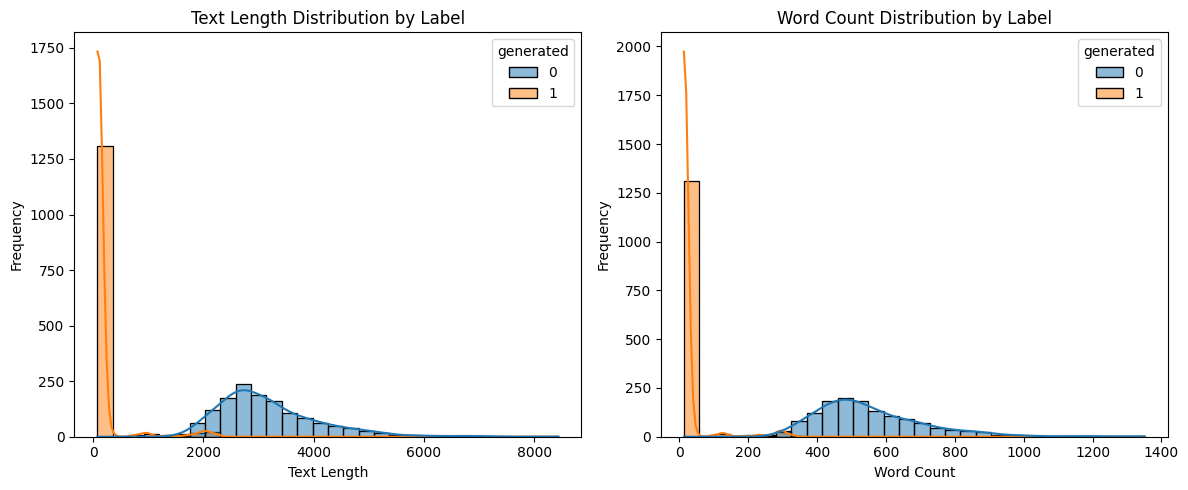

In [4]:


plt.figure(figsize=(12, 5))

# Text length distribution by label
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='text_len', hue='generated', bins=30, kde=True)
plt.title('Text Length Distribution by Label')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

# Word count distribution by label
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='word_count', hue='generated', bins=30, kde=True)
plt.title('Word Count Distribution by Label')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [75]:
print(f"Human texts: {(df['generated'] == 0).sum()}")
print(f"AI texts: {(df['generated'] == 1).sum()}")

Human texts: 1375
AI texts: 1375


In [76]:
df = df[df['word_count'] >= 100]

df['text_len'] = df['text'].str.len()
df['word_count'] = df['text'].str.split(" ").str.len()

length_stats = df.groupby('generated')[['text_len', 'word_count']].agg(['mean', 'median', 'std']).round(2)
print(length_stats)

          text_len                 word_count               
              mean  median     std       mean median     std
generated                                                   
0          3172.58  2987.0  918.44     552.93  521.0  159.24
1          1661.48  1889.0  494.43     237.03  274.0   75.71


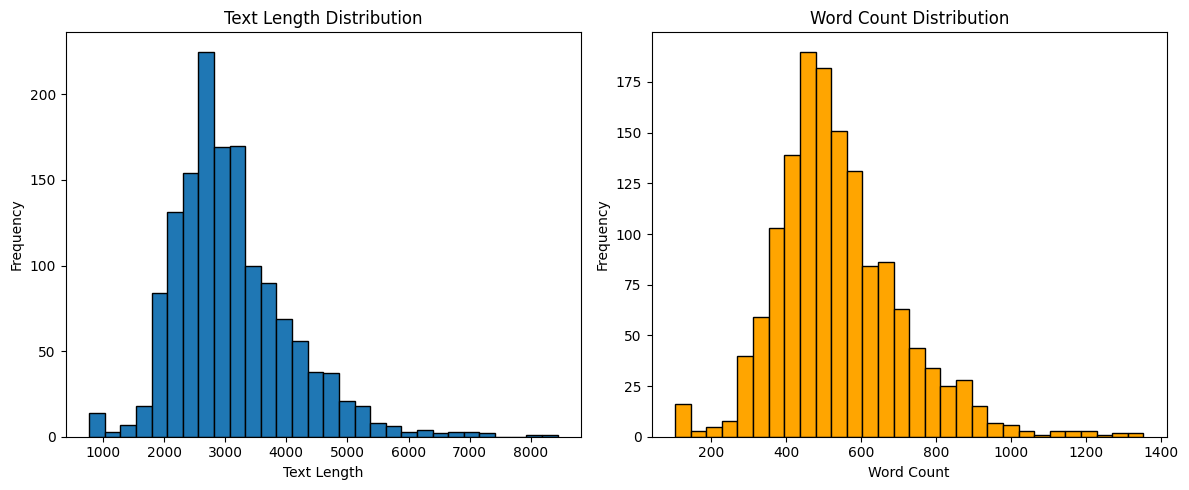

In [77]:
plt.figure(figsize=(12, 5))

# tex_len distribution
plt.subplot(1, 2, 1)
plt.hist(df['text_len'], bins=30, edgecolor='black')
plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

# word_count distribution
plt.subplot(1, 2, 2)
plt.hist(df['word_count'], bins=30, edgecolor='black', color='orange')
plt.title('Word Count Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [78]:
print(f"Human texts: {(df['generated'] == 0).sum()}")
print(f"AI texts: {(df['generated'] == 1).sum()}")

Human texts: 1375
AI texts: 62


In [ ]:
nlp = spacy.load("en_core_web_sm")
doc = nlp(df["text"][0])
sentences = list(doc.sents)
for sent in sentences:
    print(sent)